In [ ]:
from urllib.request import urlretrieve

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c0623189100>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Analysis and Visulaization**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Age**

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal= 'box',
                   nbins= 47,
                   title= "Distribution of Ages")
fig.update_layout(bargap = 0.15)
fig.show()

In [ ]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [ ]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                   title= "Distribution of BMI")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color='smoker',
                   color_discrete_sequence= ['green', 'grey'],
                   title= "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color='sex',
                   color_discrete_sequence= ['skyblue', 'blue'],
                   title= "Annual Medical Charges on Gender")
fig.update_layout(bargap = 0.1)
fig.show()

# **Smoker**

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x ='smoker', color = 'sex', title= "Smoker")

In [ ]:
px.histogram(medical_df, x ='children', color = 'sex', title= "Region")

# **Age and Charges**

In [33]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age VS Charges')
fig.update_traces(marker_size=5)
fig.show()

# **BMI & Charges**

In [34]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [36]:
fig = px.scatter(medical_df,
                 x='region',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Region VS Charges')
fig.update_traces(marker_size=5)
fig.show()

In [39]:
px.violin(medical_df,
                 x='children',
                 y='charges')

# **Correlation**

In [41]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [42]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [43]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [44]:
smoker_values={ 'no' :0, 'yes' :1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [46]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [48]:
medical_df.select_dtypes(include=['number']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlational Matrix')

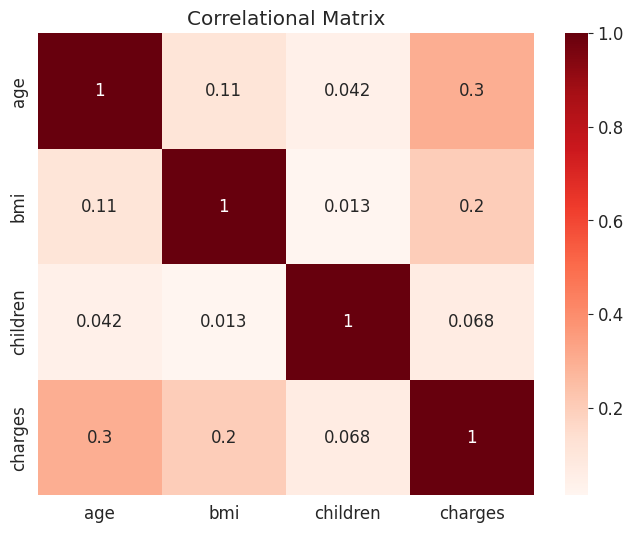

In [49]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title("Correlational Matrix")